# Configuración inicial

* En este notebook vamos a descargar el dataset `book` que contiene muchos libros en ingles en formato de texto tokenizado, de los cuales vamos a hacer procesamiento.

In [1]:
import nltk 
nltk.download('book')
from nltk.book import *
import matplotlib.pyplot as plt
import numpy as np

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Tarto\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\Tarto\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\brown.zip.
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     C:\Users\Tarto\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\chat80.zip.
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\Tarto\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\cmudict.zip.
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     C:\Users\Tarto\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\conll2000.zip.
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     C:\Users\Tarto\AppData\Roaming\nltk_data...
[nltk_data]    |   U

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


Matplotlib is building the font cache; this may take a moment.


# Analizando un texto

In [2]:
# Se escoge el texto n°1
text1

<Text: Moby Dick by Herman Melville 1851>

In [3]:
# Vemos que el texto ya viene tokenizado incluyendo caracteres especiales
text1.tokens[:10]

['[',
 'Moby',
 'Dick',
 'by',
 'Herman',
 'Melville',
 '1851',
 ']',
 'ETYMOLOGY',
 '.']

In [5]:
# ¿Cuantos tokens tiene el libro?   IMPORTANTE... TOKEN =/= PALABRAS
len(text1)

260819

## Medida de riqueza lexica en un texto: 
$$ R_l = \frac{\text{total de palabras únicas}}{\text{total de palabras}} = \frac{\text{longitud del vocabulario}}{\text{longitud del texto}}$$ 

In [6]:
# Primero realizamos la construcción de un vocabulario (identificamos las palabras unicas que hay en el libro)
# https://docs.python.org/2/library/sets.html

vocabulario = sorted(set(text1))  # Con sorted, ademas de ordenar, pasas la estructura de diccionario a estructura de lista
vocabulario[1000:1050]
# Vocabulario: Lista de palabras unicas, los repetidos no se incluyen

['Crew',
 'Crish',
 'Crockett',
 'Cross',
 'Crossed',
 'Crossing',
 'Crotch',
 'Crowding',
 'Crown',
 'Crozetts',
 'Cruelty',
 'Cruising',
 'Cruppered',
 'Crusaders',
 'Crushed',
 'Crying',
 'Cuba',
 'Curious',
 'Curse',
 'Cursed',
 'Curses',
 'Cussed',
 'Customs',
 'Cut',
 'Cutter',
 'Cutting',
 'Cuvier',
 'Cyclades',
 'Czar',
 'D',
 'DAGGOO',
 'DAM',
 'DANCE',
 'DANCING',
 'DANIEL',
 'DANISH',
 'DARKENS',
 'DARWIN',
 'DAVENANT',
 'DEAD',
 'DEATH',
 'DEBELL',
 'DECK',
 'DEL',
 'DESTROYED',
 'DEVIL',
 'DICTIONARY',
 'DID',
 'DIGNITY',
 'DISCOVERS']

In [9]:
# luego definimos la medida de riqueza léxica:
rl = len(set(text1))/len(text1)
print(rl)
# Longitud de Vocabulario / Longitud Texto

0.07406285585022564


In [10]:
# Definicion de funciones

# Calculo de riqueza lexica
def riqueza_lexica(texto):
  return len(sorted(set(texto)))/len(texto)

# Funcion para obtener el % de uso de una palabra, no es una funcion muy util por diversas razones.
def porcentaje_palabra(palabra, texto):
  return 100*texto.count(palabra)/len(texto)

# Comprobar su funcionamiento
riqueza_lexica(text1)

0.07406285585022564

In [11]:
# podemos calcular el porcentaje de texto que ocupa una palabra en una cadena larga de texto.
porcentaje_palabra('monster', text1)

0.018786974875296663

In [12]:
# y calcular en conteo el numero de veces que aparece:
text1.count('monster')

49

In [14]:
import re

def lexical_affluence(corpus):
    vocabulary = sorted(set(corpus))
    return len(vocabulary) / len(corpus)

texts = [ i for i in dir(nltk.book) if re.search(r'text\d', i)]
for text in texts:
    exec(compile(f'print({text}.name, "\\n", lexical_affluence({text}), "\\n" )', 
        '', 'exec'))

Moby Dick by Herman Melville 1851 
 0.07406285585022564 

Sense and Sensibility by Jane Austen 1811 
 0.04826383002768831 

The Book of Genesis 
 0.06230453042623537 

Inaugural Address Corpus 
 0.06617622515804722 

Chat Corpus 
 0.13477005109975562 

Monty Python and the Holy Grail 
 0.1276595744680851 

Wall Street Journal 
 0.12324685128531129 

Personals Corpus 
 0.22765564002465585 

The Man Who Was Thursday by G . K . Chesterton 1908 
 0.0983485761345412 



# Estadistica del Lenguaje

Los cálculos estadísticos más simples que se pueden efectuar sobre un texto o un corpus son los relacionados con frecuencia de aparición de palabras.

* Podemos construir un diccionario en Python donde las llaves sean las palabras y los valores sean las frecuencias de ocurrencias de esas palabras.

* ejemplo `dic = {'monster': 49 ,  'boat': 54,  ...}`


In [15]:
# METODO NO recomendable para conjuntos muy grandes
dic = {}
for palabra in set(text1):
  #dic[palabra] = porcentaje_palabra(palabra, text1)
  dic[palabra] = text1.count(palabra)
dic
# Metodo excesivamente lento

{'heroic': 2,
 'eloquent': 1,
 'vanquished': 1,
 'fritters': 3,
 'SISTER': 1,
 'nonce': 2,
 'manliest': 1,
 'liver': 4,
 'Invisible': 1,
 'ELLERY': 1,
 'tearlessness': 1,
 'miner': 1,
 'thimbleful': 1,
 'masterless': 2,
 'unthinking': 1,
 'turnstile': 1,
 'Childe': 1,
 'trivial': 1,
 'upbraiding': 1,
 'Divine': 2,
 'nick': 1,
 'Milky': 1,
 'won': 30,
 'invariability': 1,
 'arrah': 1,
 'issues': 1,
 'WHALESHIPS': 1,
 'pestiferously': 1,
 'discoursing': 2,
 'canvas': 14,
 'forts': 1,
 'rising': 29,
 'credible': 1,
 'rebelling': 1,
 'vehicle': 1,
 'diffused': 3,
 'soliloquized': 4,
 'bored': 2,
 'BOSOM': 1,
 'depending': 1,
 'SORTS': 1,
 'Skrimshander': 1,
 'jam': 2,
 'shuffle': 1,
 'ETCHINGS': 1,
 'shell': 4,
 'tingled': 1,
 'running': 44,
 'mortar': 4,
 'Pacific': 32,
 'host': 10,
 'Fitz': 1,
 'icily': 1,
 'possibilities': 2,
 'gifts': 1,
 'Now': 139,
 'mission': 1,
 'accompanying': 5,
 'whitish': 2,
 'Carpet': 1,
 'Certain': 2,
 'official': 5,
 'famine': 2,
 'decreed': 2,
 'stubborn': 

## Método FreqDist de NLTK

In [18]:
# NLTK tiene un metodo muy eficiente
fdist = FreqDist(text1)

In [19]:
fdist.most_common(20)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632)]

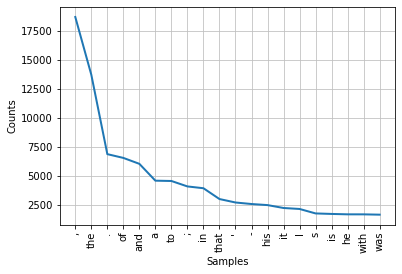

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [20]:
fdist.plot(20)

In [21]:
fdist['monster']

49

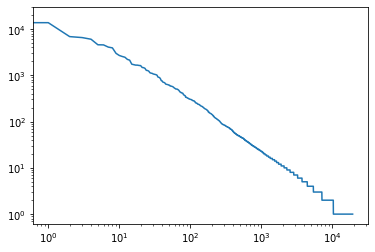

In [22]:
# Obtencion del grafico log-log para analisis de texto [Ley de Zipf]
a=list(fdist.values())
a=np.array(a)
a=np.sort(a)
a=a[::-1]
plt.yscale('log')
plt.xscale('log')
plt.plot(a)

## Distribuciones sobre contenido con filtro-fino

* Como vimos en la sección anterior, los tokens más frecuentes en un texto no son necesariamente las palabras que mas informacion nos arrojan sobre el contenido del mismo. 
* Por ello, es mejor filtrar y construir distribuciones de frecuencia que no consideren signos de puntuación o caracteres especiales

In [23]:
# Tal vez sea más interesante estudiar palabras que tengan una longitud minima especifica
long_words = [palabra for palabra in text1 if len(palabra)>5]
vocabulario_filtrado = sorted(set(long_words))
vocabulario_filtrado[:10]
# Al quitar las palabras con un tamaño menor a 5 caracteres, se quita la mayoria de los conectores y todos los caracteres
# espaciales

['ACCOUNT',
 'ADDITIONAL',
 'ADVANCING',
 'ADVENTURES',
 'AFFGHANISTAN',
 'AFRICA',
 'AGAINST',
 'ALFRED',
 'ALGERINE',
 'AMERICA']

Podemos ahora construir una lista de tuplas, basados en los conteos ya pre-calculados de la función `FreqDist`, así:

`fdist_filtrado = [('account', 2), ('additional', 32), ('advancing', 5), ...]`

Luego podemos convertir el objeto creado a formato de `np.array`de **Numpy** para poder hacer un sort por palabras mas frecuentes.

`fdist_filtrado = np.array(fdist_filtrado, *args)`

`np.sort(fdist_filtrado, *args) = [('account', 2), ('advancing', 5), ('additional', 32), ...]`

In [25]:
palabras_interesantes = [(palabra, fdist[palabra]) for palabra in set(text1) if len(palabra)>5 and fdist[palabra]>10]
dtypes = [('word', 'S10'), ('frequency', int)]
palabras_interesantes = np.array(palabras_interesantes, dtype=dtypes)
palabras_ordenadas = np.sort(palabras_interesantes, order = 'frequency')
palabras_ordenadas[-20:] # top de palabras mas frecuentes


# Pieza alternativa de codigo
# dtypes = [(‘word’,object),(‘frequency’,int)]
# palabras_interesantes_np = np.array(palabras_interesantes, dtype = dtypes)

array([(b'between', 117), (b'something', 119), (b'against', 132),
       (b'things', 132), (b'thought', 149), (b'CHAPTER', 150),
       (b'without', 154), (b'Pequod', 172), (b'should', 181),
       (b'almost', 186), (b'Starbuck', 196), (b'himself', 203),
       (b'Captain', 215), (b'through', 227), (b'whales', 237),
       (b'little', 247), (b'Queequeg', 252), (b'seemed', 283),
       (b'before', 293), (b'though', 335)],
      dtype=[('word', 'S10'), ('frequency', '<i4')])

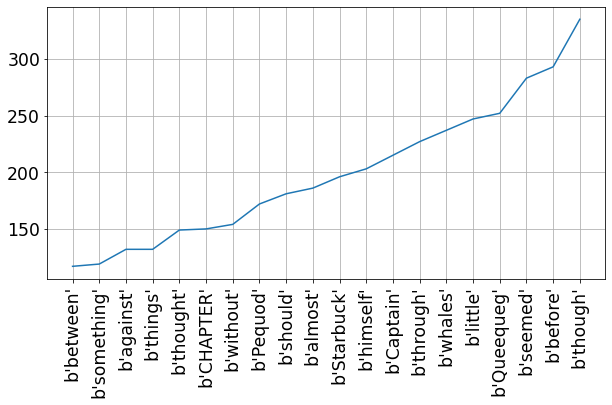

In [26]:
# Construccion de un grafico de barras customizado con Matplotlib
# https://matplotlib.org/3.1.1/gallery/ticks_and_spines/custom_ticker1.html#sphx-glr-gallery-ticks-and-spines-custom-ticker1-py
top_words = 20
x = np.arange(len(palabras_ordenadas[-top_words:]))
y = [freq[1] for freq in palabras_ordenadas[-top_words:]]
plt.figure(figsize=(10,5))
plt.plot(x, y)
plt.xticks(x, [str(freq[0]) for freq in palabras_ordenadas[-top_words:]], rotation = 'vertical')
plt.tick_params(labelsize = 'xx-large')
plt.grid(True)
plt.show()

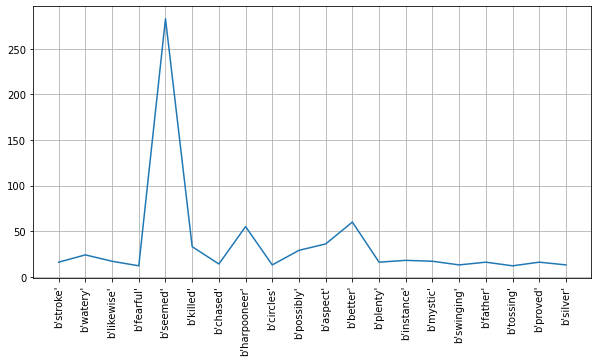

In [28]:
top_words = 20
# x seran las palabras e y = seran la cantidad de veces que aparecen
# x, y tienen que ser arrays para poder ser graficados
# con np.arrange(len... estamos crando un array de las longitudes de las palabras
# palabras_interesantes[-top_words:]['word']
# Esto creara un arreglo de numeros enteros de 0..top_words (top_words elementos)
x = np.arange(len(palabras_interesantes[-top_words:]))
# Esto me devuelve las frecuencias para cada x
y = palabras_interesantes[-top_words:]['frequency']

# Dimensionar la imagen
plt.figure(figsize=(10, 5))
plt.xticks (x, palabras_interesantes[-top_words:]['word'], rotation='vertical')
# Renderizar los valores
plt.plot (x,y)
# Colocar un grid de background
plt.grid(True)
# Finalmentem, mostrar el grafico
plt.show()